In [ ]:
# Question 1: Feature Scaling
# Task: Explain why feature scaling is essential and demonstrate the impact of unscaled features on a machine learning model.




# Question 2: Min-Max Scaling
# Task: Implement Min-Max Scaling on the Iris dataset.



# Question 3: Standardization (Z-score Scaling)
# Task: Implement Standardization using Z-score scaling on the Iris dataset.




# Question 4: Robust Scaling
# Task: Implement Robust Scaling to handle outliers in the Iris dataset.







In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without scaling
model_unscaled = LogisticRegression(max_iter=200)
model_unscaled.fit(X_train, y_train)
acc_unscaled = model_unscaled.score(X_test, y_test)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_train_scaled, y_train)
acc_scaled = model_scaled.score(X_test_scaled, y_test)

print(f"Accuracy without scaling: {acc_unscaled:.4f}")
print(f"Accuracy with scaling: {acc_scaled:.4f}")


Accuracy without scaling: 1.0000
Accuracy with scaling: 1.0000


In [2]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for easy visualization
df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)
print(df_scaled.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)  
count        150.000000  
mean           0.458056  
std            0.317599  
min            0.000000  
25%            0.083333  
50%            0.500000  
75%            0.708333  
max            1.000000  


In [3]:
from sklearn.preprocessing import StandardScaler

# Load dataset
X = iris.data

# Apply Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

df_standardized = pd.DataFrame(X_standardized, columns=iris.feature_names)
print(df_standardized.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.319795e-01       3.364776e-01   
75%         6.745011e-01      5.586108e-01       7.627583e-01   
max         2.492019e+00      3.090775e+00       1.785832e+00   

       petal width (cm)  
count      1.500000e+02  
mean      -9.473903e-16  
std        1.003350e+00  
min       -1.447076e+00  
25%       -1.183812e+00  
50%        1.325097e-01  
75%        7.906707e-01  
max        1.712096e+00  


In [5]:
from sklearn.preprocessing import RobustScaler

# Load dataset
X = iris.data

# Apply Robust Scaling
scaler = RobustScaler()
X_robust = scaler.fit_transform(X)

df_robust = pd.DataFrame(X_robust, columns=iris.feature_names)
print(df_robust.describe())



       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000       1.500000e+02   
mean            0.033333          0.114667      -1.691429e-01   
std             0.636974          0.871733       5.043709e-01   
min            -1.153846         -2.000000      -9.571429e-01   
25%            -0.538462         -0.400000      -7.857143e-01   
50%             0.000000          0.000000       1.266348e-16   
75%             0.461538          0.600000       2.142857e-01   
max             1.615385          2.800000       7.285714e-01   

       petal width (cm)  
count        150.000000  
mean          -0.067111  
std            0.508158  
min           -0.800000  
25%           -0.666667  
50%            0.000000  
75%            0.333333  
max            0.800000  


In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def load_data():
    """Loads the Iris dataset and returns features and labels."""
    data = load_iris()
    return pd.DataFrame(data.data, columns=data.feature_names), data.target

def scale_data(X, scaler):
    """Scales input data using the given scaler."""
    try:
        return scaler.fit_transform(X)
    except Exception as e:
        print(f"Scaling error: {e}")
        return X

def train_and_evaluate(X, y):
    """Splits data, trains Logistic Regression, and returns accuracy."""
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        model = LogisticRegression(max_iter=200)
        model.fit(X_train, y_train)
        return accuracy_score(y_test, model.predict(X_test))
    except Exception as e:
        print(f"Model training error: {e}")
        return None


In [7]:
def plot_distributions(X_original, X_scaled, title):
    """Visualizes original vs. scaled data distributions."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(data=X_original, ax=axes[0])
    axes[0].set_title("Original Data")

    sns.boxplot(data=pd.DataFrame(X_scaled, columns=X_original.columns), ax=axes[1])
    axes[1].set_title(f"{title} Scaled Data")
    plt.tight_layout()
    plt.show()


Unscaled Accuracy: 1.0000
Min-Max Scaled Accuracy: 0.9737


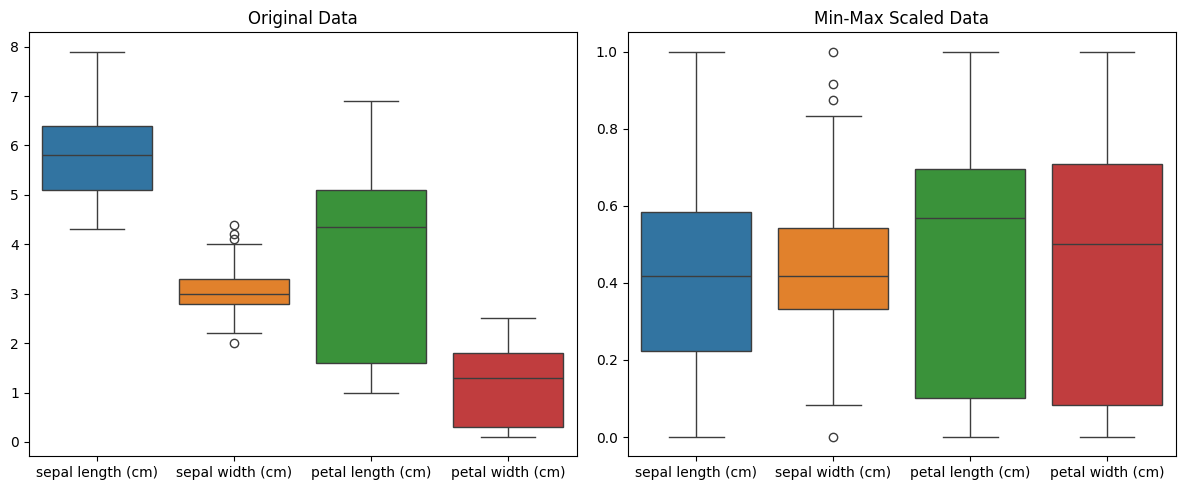

Standardized Accuracy: 1.0000


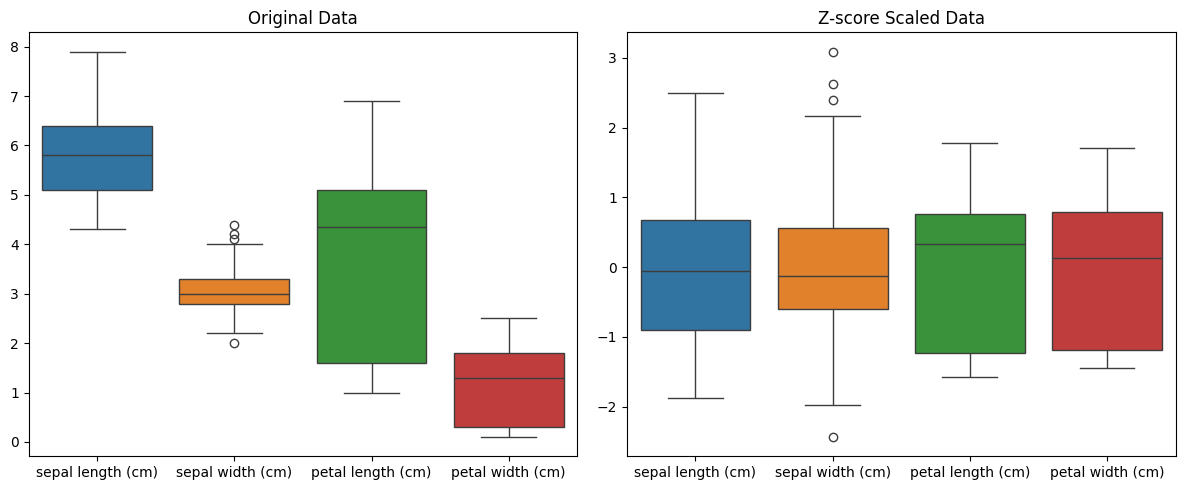

Robust Scaled Accuracy: 1.0000


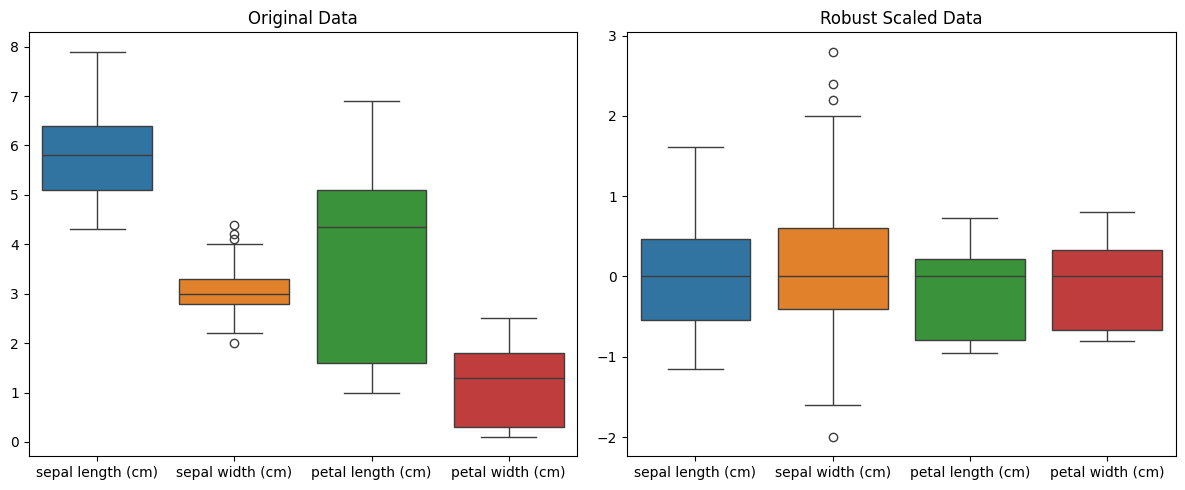

In [9]:
# Load data
X, y = load_data()

# Unscaled accuracy
unscaled_acc = train_and_evaluate(X, y)
print(f"Unscaled Accuracy: {unscaled_acc:.4f}")

# Min-Max Scaling
X_minmax = scale_data(X, MinMaxScaler())
minmax_acc = train_and_evaluate(X_minmax, y)
print(f"Min-Max Scaled Accuracy: {minmax_acc:.4f}")
plot_distributions(X, X_minmax, "Min-Max")

# Standardization
X_standard = scale_data(X, StandardScaler())
standard_acc = train_and_evaluate(X_standard, y)
print(f"Standardized Accuracy: {standard_acc:.4f}")
plot_distributions(X, X_standard, "Z-score")

# Robust Scaling
X_robust = scale_data(X, RobustScaler())
robust_acc = train_and_evaluate(X_robust, y)
print(f"Robust Scaled Accuracy: {robust_acc:.4f}")
plot_distributions(X, X_robust, "Robust")
